In [9]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
import h5py
import scipy.stats as scst
%matplotlib inline

In [222]:
v_limit = 610
BoxID = 13
filename = '../data/abacus/pairs_planck_00_box_{:02d}.hdf5'.format(BoxID)
data = {}
f = h5py.File(filename, 'r')
for k in f.keys():
    data[k] = f[k][...]
f.close()
print(data.keys())

dtype=[('BoxID','i8'), ('hubble', 'f8'), ('omega_de', 'f8'),
      ('omega_m', 'f8'), ('n_s', 'f8'), ('sigma_8', 'f8'), ('w_0', 'f8')]
cosmo_data = np.loadtxt("../data/abacus/box_cosmo_params.dat", dtype=dtype)
hubble = cosmo_data['hubble'][BoxID]
print(hubble)

dict_keys(['mass_A', 'mass_B', 'pos_A', 'pos_B', 'pos_G', 'vel_A', 'vel_B', 'vel_G', 'vmax_A', 'vmax_B', 'vmax_G'])
64.1


In [223]:
a = data['vel_A'].copy()
b = data['vel_B'].copy()
v_cm = data['vel_A'].copy()
mass_tot = data['mass_A'] + data['mass_B']
for i in range(3):
    a[:,i] = data['vel_A'][:,i] * data['mass_A']/mass_tot
    b[:,i] = data['vel_B'][:,i] * data['mass_B']/mass_tot
    v_cm[:,i] = a[:,i] + b[:,i]
v_cm_norm = np.sqrt(np.sum(v_cm**2, axis=1))
data['vel_A_mag'] = np.sqrt(np.sum(data['vel_A']**2, axis=1))

(array([4.010e+02, 2.278e+03, 4.764e+03, 6.605e+03, 6.912e+03, 6.073e+03,
        4.594e+03, 2.999e+03, 1.871e+03, 1.094e+03, 6.040e+02, 2.900e+02,
        1.350e+02, 7.500e+01, 5.500e+01, 1.800e+01, 1.100e+01, 4.000e+00,
        2.000e+00, 4.000e+00]),
 array([   9.972188,  104.15312 ,  198.33405 ,  292.51498 ,  386.69592 ,
         480.87683 ,  575.0578  ,  669.2387  ,  763.4196  ,  857.6006  ,
         951.7815  , 1045.9624  , 1140.1433  , 1234.3243  , 1328.5052  ,
        1422.6862  , 1516.8671  , 1611.048   , 1705.229   , 1799.4099  ,
        1893.5908  ], dtype=float32),
 <BarContainer object of 20 artists>)

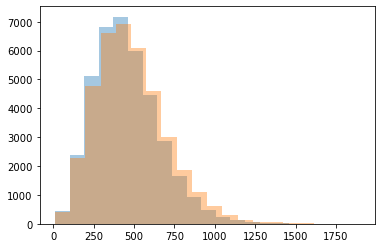

In [224]:
plt.hist(v_cm_norm, bins=20, alpha=0.4)
plt.hist(data['vel_A_mag'], bins=20, alpha=0.4)

In [225]:
data['vel_A_mag'] = np.sqrt(np.sum(data['vel_A']**2, axis=1))
data['vel_B_mag'] = np.sqrt(np.sum(data['vel_B']**2, axis=1))
data['vel_G_mag'] = np.sqrt(np.sum(data['vel_G']**2, axis=1))

data['pos_AB'] = np.sqrt(np.sum( (data['pos_B'] - data['pos_A'])**2, axis=1))
data['vel_AB'] = np.sqrt(np.sum( (data['vel_B'] - data['vel_A'])**2, axis=1))
data['vel_AB_rad'] = np.sum((data['pos_B'] - data['pos_A'])*(data['vel_B'] - data['vel_A']), axis=1)/data['pos_AB']
data['vel_AB_tan'] = np.sqrt((data['vel_AB']**2 - data['vel_AB_rad']**2))


#now we compute the radial velocity including the hubble flow
#data['vel_AB_rad'] = data['vel_AB_rad'] + (data['pos_AB'] * hubble)

datos = {}
ii = (data['pos_A'][:,0] > 10) & (data['pos_A'][:,0]<710)
keys = ['vel_A_mag', 'vel_B_mag', 'pos_AB', 'vel_AB', 'vel_AB_rad', 'vel_AB_tan', 'vmax_A', 'vmax_B']
v_cm_norm = v_cm_norm[ii]
for kk in keys:
    print(kk)
    datos[kk] = data[kk][ii]
keys = ['vel_G_mag', 'vmax_G']
for kk in keys:
    print(kk)
    datos[kk] = data[kk][:]

vel_A_mag
vel_B_mag
pos_AB
vel_AB
vel_AB_rad
vel_AB_tan
vmax_A
vmax_B
vel_G_mag
vmax_G


(array([1.1012e+04, 1.7325e+04, 7.3730e+03, 2.2950e+03, 6.0500e+02,
        1.3700e+02, 2.9000e+01, 1.0000e+01, 2.0000e+00, 1.0000e+00]),
 array([0.38034415, 1.0127965 , 1.645249  , 2.2777014 , 2.9101539 ,
        3.5426064 , 4.175059  , 4.807511  , 5.4399633 , 6.072416  ,
        6.7048683 ], dtype=float32),
 <BarContainer object of 10 artists>)

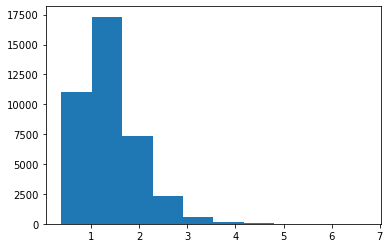

In [226]:
plt.hist(data['pos_AB'])

454.21603 476.7976


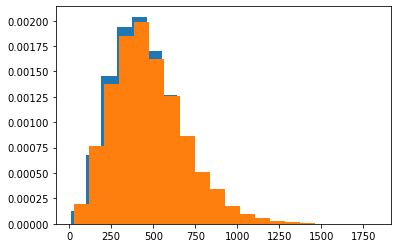

In [227]:
lim = 627
ii = (datos['vel_AB_rad']<0) & (datos['pos_AB']<1.0)
plt.hist(v_cm_norm, density=True, bins=20)
plt.hist(v_cm_norm[ii], density=True, bins=20)
print(np.mean(v_cm_norm), np.mean(v_cm_norm[ii]))

In [228]:
def compare(pec_vel, probe, name='probe', xlim=[0,100]):
    nn = len(probe)
    print(nn)
    isort = np.argsort(pec_vel)
    print(pec_vel[-nn//4])
    ii_4 = isort[-nn//4:]
    #ii_4 = pec_vel > 627
    plt.subplot(1,2,1)
    plt.plot(np.sort(probe), np.linspace(0.0, 1.0, nn))
    plt.plot(np.sort(probe[ii_4]), np.linspace(0.0, 1.0, np.count_nonzero(ii_4)))

    res = scst.ks_2samp(probe,probe[ii_4])
    print(res.statistic)
    print(res.pvalue)
    plt.title('KS statistic={:.2f} - p_value={:.2e}'.format(res.statistic, res.pvalue))
    plt.xlabel(name)
    plt.xlim(xlim)
    plt.grid()
    
    plt.subplot(1,2,2)
    plt.hist(np.sort(probe), density=True)
    plt.hist(np.sort(probe[ii_4]), density=True, alpha=0.4)
    #plt.hist(np.sort(probe[ii_others]), density=True, alpha=0.4)

    print(np.median(probe), np.median(probe[ii_4]), np.count_nonzero(probe[ii_4]))

9783
731.1447
0.08172887220969778
7.903455667701564e-12
-0.5036568 -0.36942887 2446


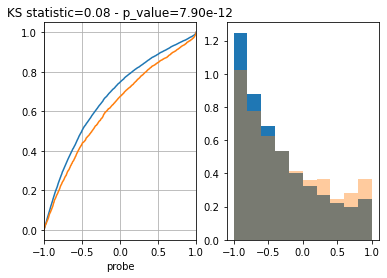

In [229]:
probe = (datos['vel_AB_tan']**2 - abs(datos['vel_AB_rad'])**2)/(datos['vel_AB_tan']**2 + abs((datos['vel_AB_rad'])**2))
beta = 1.0 - 0.5*(datos['vel_AB_tan']**2/datos['vel_AB_rad']**2)
ii = (datos['vel_AB_rad']<0) & (datos['pos_AB']<1.0)
compare(v_cm_norm[ii], probe[ii], xlim=[-1,1])

9783
731.1447
0.08172887220969778
7.903455667701564e-12
0.8349546 0.7697685 2446


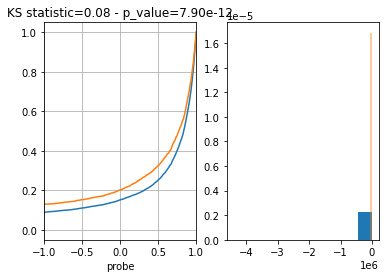

In [230]:
beta = 1.0 - 0.5*(datos['vel_AB_tan']**2/datos['vel_AB_rad']**2)
ii = (datos['vel_AB_rad']<0) & (datos['pos_AB']<1.0)
compare(v_cm_norm[ii], beta[ii], xlim=[-1,1])

(array([108.,  96.,  92., 104.,  95., 101., 109.,  99., 105.,  91.]),
 array([-9.99143834e-01, -7.99462591e-01, -5.99781348e-01, -4.00100106e-01,
        -2.00418863e-01, -7.37620566e-04,  1.98943622e-01,  3.98624865e-01,
         5.98306107e-01,  7.97987350e-01,  9.97668592e-01]),
 <BarContainer object of 10 artists>)

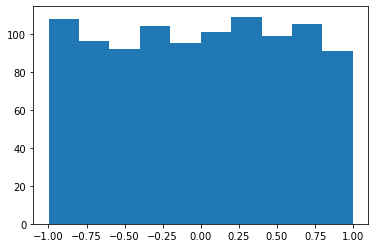

In [231]:
A = np.random.random(1000)
E_tot = np.random.random(1000)
frac = np.random.random(1000)
A = frac*E_tot
B = (1-frac)*E_tot
plt.hist((A-B)/(A+B))

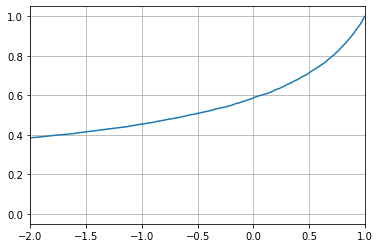

In [248]:
n_points = 10000
phi = np.random.random(n_points)*2.0*np.pi
theta = np.arccos(2.0*(np.random.random(n_points)-0.5))
vx = np.random.normal(scale=4.0, size=n_points)
vy = np.random.normal(scale=4.0, size=n_points)
vz = np.random.normal(scale=4.0, size=n_points)

r = np.sqrt(vx**2 + vy**2 + vz**2)
x = r*np.sin(theta)*np.cos(phi)
y = r*np.sin(theta)*np.sin(phi)
z = r*np.cos(theta)

radial = z.copy()
tangential = np.sqrt(x**2 + y**2)

total = np.sqrt(x**2 + y**2 + z**2)
beta = 1.0 - 0.5*(tangential**2/radial**2)
plt.plot(np.sort(beta), np.linspace(0,1,n_points))
plt.xlim([-2,1])
plt.grid()

(array([ 304., 1345., 2363., 2451., 1804., 1030.,  471.,  170.,   55.,
           7.]),
 array([0.05465544, 0.49128036, 0.92790527, 1.36453019, 1.8011551 ,
        2.23778002, 2.67440494, 3.11102985, 3.54765477, 3.98427968,
        4.4209046 ]),
 <BarContainer object of 10 artists>)

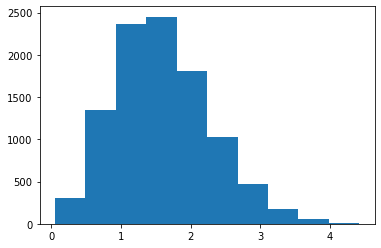

In [210]:
plt.hist(total)

(array([1017.,  998., 1028., 1025.,  953., 1008., 1003.,  952., 1025.,
         991.]),
 array([-9.99180201e-01, -7.99271326e-01, -5.99362451e-01, -3.99453576e-01,
        -1.99544701e-01,  3.64173596e-04,  2.00273049e-01,  4.00181923e-01,
         6.00090798e-01,  7.99999673e-01,  9.99908548e-01]),
 <BarContainer object of 10 artists>)

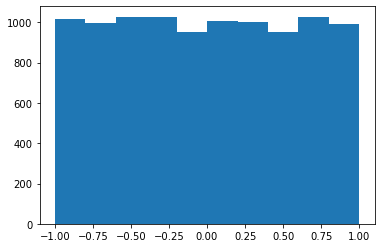

In [205]:
#plt.hist(tangential**2/total**2)
plt.hist(radial/total)

In [190]:
probe

array([-0.3783075 ,  0.83278465, -0.15291531, ..., -0.8291576 ,
       -0.7686417 , -0.29241875], dtype=float32)

Text(0.5, 1.0, 'Npairs=302,  Nhalos=100611')

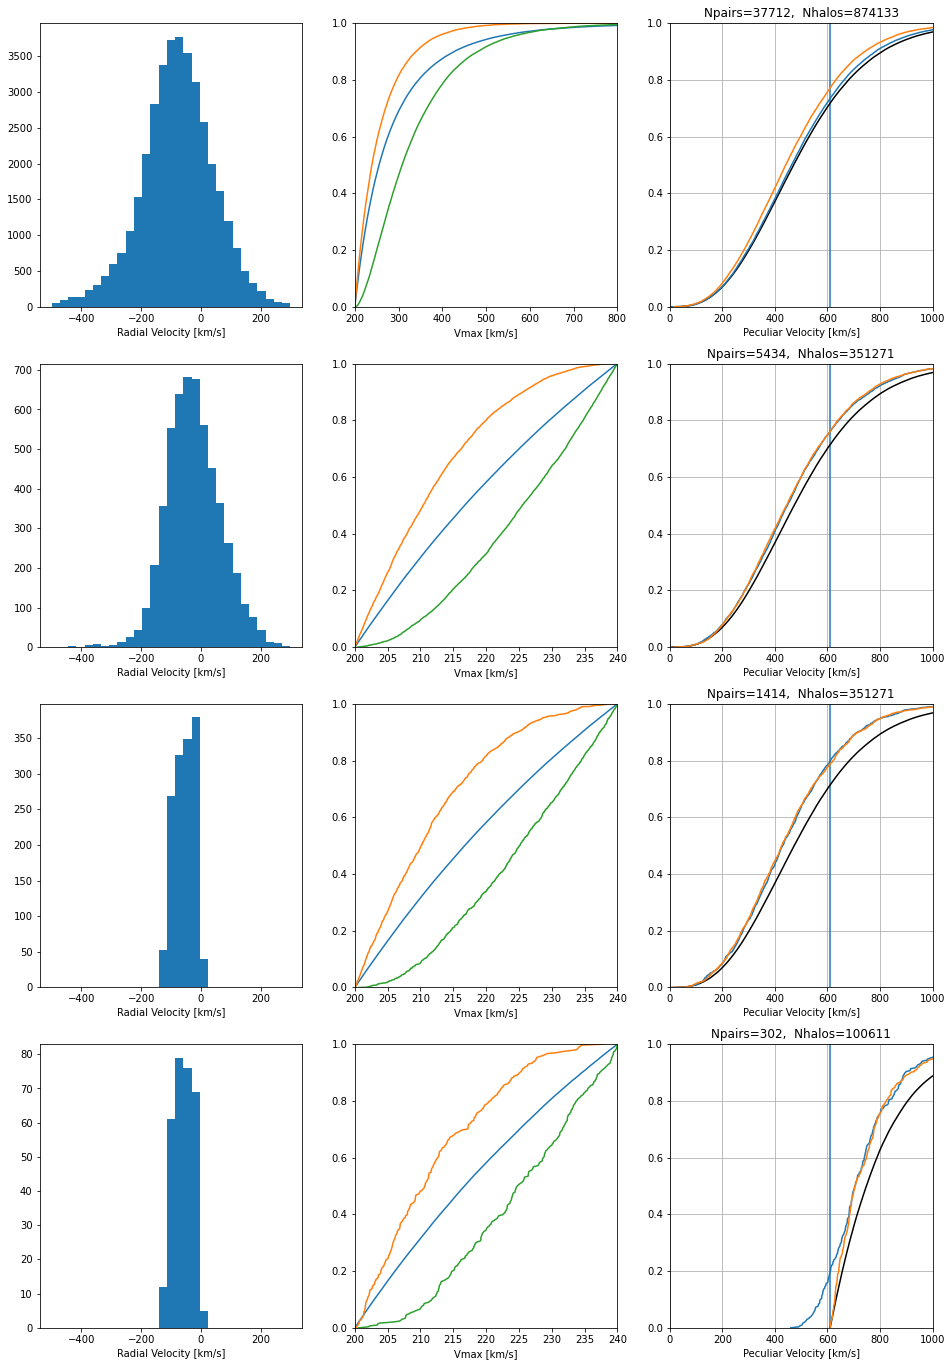

In [15]:
plt.figure(figsize=(16,24))

# Input sample
plt.subplot(4,3,1)
_ = plt.hist(datos['vel_AB_rad'], bins=np.linspace(-500,300, 30))
plt.xlabel("Radial Velocity [km/s]")

plt.subplot(4,3,2)
plt.plot(np.sort(datos['vmax_G']), np.linspace(0,1,len(datos['vmax_G'])))
plt.plot(np.sort(datos['vmax_A']), np.linspace(0,1,len(datos['vmax_A'])))
plt.plot(np.sort(datos['vmax_B']), np.linspace(0,1,len(datos['vmax_B'])))
plt.xlabel("Vmax [km/s]")
plt.xlim(200,800)
plt.ylim(0,1)

plt.subplot(4,3,3)
plt.plot(np.sort(datos['vel_G_mag']), np.linspace(0,1,len(datos['vel_G_mag'])), color='black')
plt.plot(np.sort(datos['vel_A_mag']), np.linspace(0,1,len(datos['vel_A_mag'])))
plt.plot(np.sort(datos['vel_B_mag']), np.linspace(0,1,len(datos['vel_B_mag'])))
plt.xlim(0,1000)
plt.ylim(0,1)
plt.vlines(v_limit, 0,1)
plt.xlabel("Peculiar Velocity [km/s]")
plt.grid()
plt.title('Npairs={}, '.format(len(datos['vel_AB_rad']))+' Nhalos={}'.format(len(datos['vmax_G'])))


# Selection in vmax
ii = ((datos['vmax_A'] < 240) & (datos['vmax_B']<240)) 
ll = (datos['vmax_G'] < 240)

plt.subplot(4,3,4)
_ = plt.hist(datos['vel_AB_rad'][ii], bins=np.linspace(-500,300, 30))
plt.xlabel("Radial Velocity [km/s]")



plt.subplot(4,3,5)
plt.plot(np.sort(datos['vmax_G'][ll]), np.linspace(0,1,len(datos['vmax_G'][ll])))
plt.plot(np.sort(datos['vmax_A'][ii]), np.linspace(0,1,len(datos['vmax_A'][ii])))
plt.plot(np.sort(datos['vmax_B'][ii]), np.linspace(0,1,len(datos['vmax_B'][ii])))
plt.xlabel("Vmax [km/s]")
plt.xlim(200,240)
plt.ylim(0,1)

plt.subplot(4,3,6)
plt.plot(np.sort(datos['vel_G_mag'][ll]), np.linspace(0,1,len(datos['vel_G_mag'][ll])), color='black')
plt.plot(np.sort(datos['vel_A_mag'][ii]), np.linspace(0,1,len(datos['vel_A_mag'][ii])))
plt.plot(np.sort(datos['vel_B_mag'][ii]), np.linspace(0,1,len(datos['vel_B_mag'][ii])))
plt.xlim(0,1000)
plt.ylim(0,1)
plt.vlines(v_limit, 0,1)
plt.xlabel("Peculiar Velocity [km/s]")
plt.grid()
plt.title('Npairs={}, '.format(len(datos['vel_AB_rad'][ii]))+' Nhalos={}'.format(len(datos['vmax_G'][ll])))


jj = (datos['vel_AB_rad'] < 0) & (datos['vel_AB_rad'] > -120) & (datos['vel_AB_tan'] < 80) 

# Selection in radial and tangential kinematics


plt.subplot(4,3,7)
_ = plt.hist(datos['vel_AB_rad'][ii&jj], bins=np.linspace(-500,300, 30))
plt.xlabel("Radial Velocity [km/s]")



plt.subplot(4,3,8)
plt.plot(np.sort(datos['vmax_G'][ll]), np.linspace(0,1,len(datos['vmax_G'][ll])))
plt.plot(np.sort(datos['vmax_A'][ii&jj]), np.linspace(0,1,len(datos['vmax_A'][ii&jj])))
plt.plot(np.sort(datos['vmax_B'][ii&jj]), np.linspace(0,1,len(datos['vmax_B'][ii&jj])))
plt.xlabel("Vmax [km/s]")
plt.xlim(200,240)
plt.ylim(0,1)

plt.subplot(4,3,9)
plt.plot(np.sort(datos['vel_G_mag'][ll]), np.linspace(0,1,len(datos['vel_G_mag'][ll])), color='black')
plt.plot(np.sort(datos['vel_A_mag'][ii&jj]), np.linspace(0,1,len(datos['vel_A_mag'][ii&jj])))
plt.plot(np.sort(datos['vel_B_mag'][ii&jj]), np.linspace(0,1,len(datos['vel_B_mag'][ii&jj])))
plt.xlim(0,1000)
plt.ylim(0,1)
plt.vlines(v_limit, 0,1)
plt.xlabel("Peculiar Velocity [km/s]")
plt.grid()
plt.title('Npairs={}, '.format(len(datos['vel_AB_rad'][ii&jj]))+' Nhalos={}'.format(len(datos['vmax_G'][ll])))



# Selection only about peculiar velocity

mm = datos['vel_B_mag'] > v_limit
nn = (datos['vel_G_mag'] > v_limit)

plt.subplot(4,3,10)
_ = plt.hist(datos['vel_AB_rad'][ii&jj&mm], bins=np.linspace(-500,300, 30))
plt.xlabel("Radial Velocity [km/s]")


plt.subplot(4,3,11)
plt.plot(np.sort(datos['vmax_G'][ll&nn]), np.linspace(0,1,len(datos['vmax_G'][ll&nn])))
plt.plot(np.sort(datos['vmax_A'][ii&jj&mm]), np.linspace(0,1,len(datos['vmax_A'][ii&jj&mm])))
plt.plot(np.sort(datos['vmax_B'][ii&jj&mm]), np.linspace(0,1,len(datos['vmax_B'][ii&jj&mm])))
plt.xlabel("Vmax [km/s]")
plt.xlim(200,240)
plt.ylim(0,1)

plt.subplot(4,3,12)
plt.plot(np.sort(datos['vel_G_mag'][ll&nn]), np.linspace(0,1,len(datos['vel_G_mag'][ll&nn])), color='black')
plt.plot(np.sort(datos['vel_A_mag'][ii&jj&mm]), np.linspace(0,1,len(datos['vel_A_mag'][ii&jj&mm])))
plt.plot(np.sort(datos['vel_B_mag'][ii&jj&mm]), np.linspace(0,1,len(datos['vel_B_mag'][ii&jj&mm])))
plt.xlim(0,1000)
plt.ylim(0,1)
plt.vlines(v_limit, 0,1)
plt.xlabel("Peculiar Velocity [km/s]")
plt.grid()
plt.title('Npairs={}, '.format(len(datos['vel_AB_rad'][ii&jj&mm]))+' Nhalos={}'.format(len(datos['vmax_G'][ll&nn])))

